In [10]:
# Cell 1: Imports and Configurations
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from PIL import Image
import random

# Style and warnings
plt.style.use('ggplot')
sns.set_palette('muted')
warnings.simplefilter('ignore')

# Version info
print(f"Pandas Version: {pd.__version__}")
print(f"Numpy Version: {np.__version__}")


Pandas Version: 2.2.3
Numpy Version: 2.2.3


In [5]:
# Cell 2: Dataset Path Setup and Directory Check
from pathlib import Path

data_root = Path(r"C:\Users\Keerthana Shivaratri\OneDrive\Documents\modified-dataset")

if data_root.exists():
    print(f"✅ Directory exists: {data_root}\n")
    files = list(data_root.glob("*"))
    print("Files available:")
    for f in files:
        print(f"- {f.name}")
        
    csv_files = [f.name for f in files if f.suffix == ".csv"]
    print(f"\nCSV Files Found: {csv_files if csv_files else 'None'}")
else:
    print(f"❌ Directory does not exist: {data_root}")


✅ Directory exists: C:\Users\Keerthana Shivaratri\OneDrive\Documents\modified-dataset

Files available:
- test
- train
- val

CSV Files Found: None


In [11]:
# Cell 3: Traverse Subfolders and Preview Contents
splits = ['train', 'test', 'val']

for split in splits:
    folder = data_root / split
    print(f"\n{'='*40}\nExploring {split.upper()} Folder\n{'='*40}")
    
    if folder.exists():
        items = sorted(folder.iterdir())
        print(f"Total Items: {len(items)}\nDetails:")
        
        for i, item in enumerate(items, 1):
            if item.is_dir():
                count = len(list(item.glob("*")))
                print(f"  {i}. {item.name}/ — {count} files")
            else:
                print(f"  {i}. {item.name} — File")
        
        print(f"\nPreviewing First Few Subfolders in {split.upper()}:")
        for sub in items[:5]:
            if sub.is_dir():
                preview_files = [f.name for f in sub.glob("*")][:3]
                print(f"  {sub.name}/ -> {preview_files}")
    else:
        print(f"❌ Folder Missing: {folder}")



Exploring TRAIN Folder
Total Items: 10
Details:
  1. Battery/ — 240 files
  2. Keyboard/ — 240 files
  3. Microwave/ — 240 files
  4. Mobile/ — 240 files
  5. Mouse/ — 240 files
  6. PCB/ — 240 files
  7. Player/ — 240 files
  8. Printer/ — 240 files
  9. Television/ — 240 files
  10. Washing Machine/ — 240 files

Previewing First Few Subfolders in TRAIN:
  Battery/ -> ['battery_0.jpg', 'battery_1.jpg', 'battery_10.jpg']
  Keyboard/ -> ['Keyboard_0.jpg', 'Keyboard_1.jpg', 'Keyboard_10.jpg']
  Microwave/ -> ['Microwave_0.jpg', 'Microwave_1.jpg', 'Microwave_10.jpg']
  Mobile/ -> ['Mobile_0.jpg', 'Mobile_1.jpg', 'Mobile_10.jpg']
  Mouse/ -> ['Mouse_0.jpg', 'Mouse_1.jpg', 'Mouse_10.jpg']

Exploring TEST Folder
Total Items: 10
Details:
  1. Battery/ — 30 files
  2. Keyboard/ — 30 files
  3. Microwave/ — 30 files
  4. Mobile/ — 30 files
  5. Mouse/ — 30 files
  6. PCB/ — 30 files
  7. Player/ — 30 files
  8. Printer/ — 30 files
  9. Television/ — 30 files
  10. Washing Machine/ — 30 files



In [12]:
# Cell 4: Compute Summary for Each Category
import pandas as pd
categories = ['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 
              'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']

summary = {
    'Category': [],
    'Train': [],
    'Test': [],
    'Validation': [],
    'Total': []
}

for cat in categories:
    t = data_root / 'train' / cat
    tst = data_root / 'test' / cat
    val = data_root / 'val' / cat
    
    t_count = len(list(t.glob("*"))) if t.exists() else 0
    tst_count = len(list(tst.glob("*"))) if tst.exists() else 0
    v_count = len(list(val.glob("*"))) if val.exists() else 0
    
    summary['Category'].append(cat)
    summary['Train'].append(t_count)
    summary['Test'].append(tst_count)
    summary['Validation'].append(v_count)
    summary['Total'].append(t_count + tst_count + v_count)

df_info = pd.DataFrame(summary)

print("\n📊 E-WASTE SUMMARY")
print("=" * 50)
print(df_info.to_string(index=False))

total_imgs = df_info['Total'].sum()
print(f"\n🔢 Total Categories: {len(categories)}")
print(f"📦 Total Images: {total_imgs}")
print(f"🧪 Train/Test/Val Split:")
print(f"  Train: {df_info['Train'].sum()} ({df_info['Train'].sum()/total_imgs*100:.1f}%)")
print(f"  Test: {df_info['Test'].sum()} ({df_info['Test'].sum()/total_imgs*100:.1f}%)")
print(f"  Val: {df_info['Validation'].sum()} ({df_info['Validation'].sum()/total_imgs*100:.1f}%)")



📊 E-WASTE SUMMARY
       Category  Train  Test  Validation  Total
        Battery    240    30          30    300
       Keyboard    240    30          30    300
      Microwave    240    30          30    300
         Mobile    240    30          30    300
          Mouse    240    30          30    300
            PCB    240    30          30    300
         Player    240    30          30    300
        Printer    240    30          30    300
     Television    240    30          30    300
Washing Machine    240    30          30    300

🔢 Total Categories: 10
📦 Total Images: 3000
🧪 Train/Test/Val Split:
  Train: 2400 (80.0%)
  Test: 300 (10.0%)
  Val: 300 (10.0%)


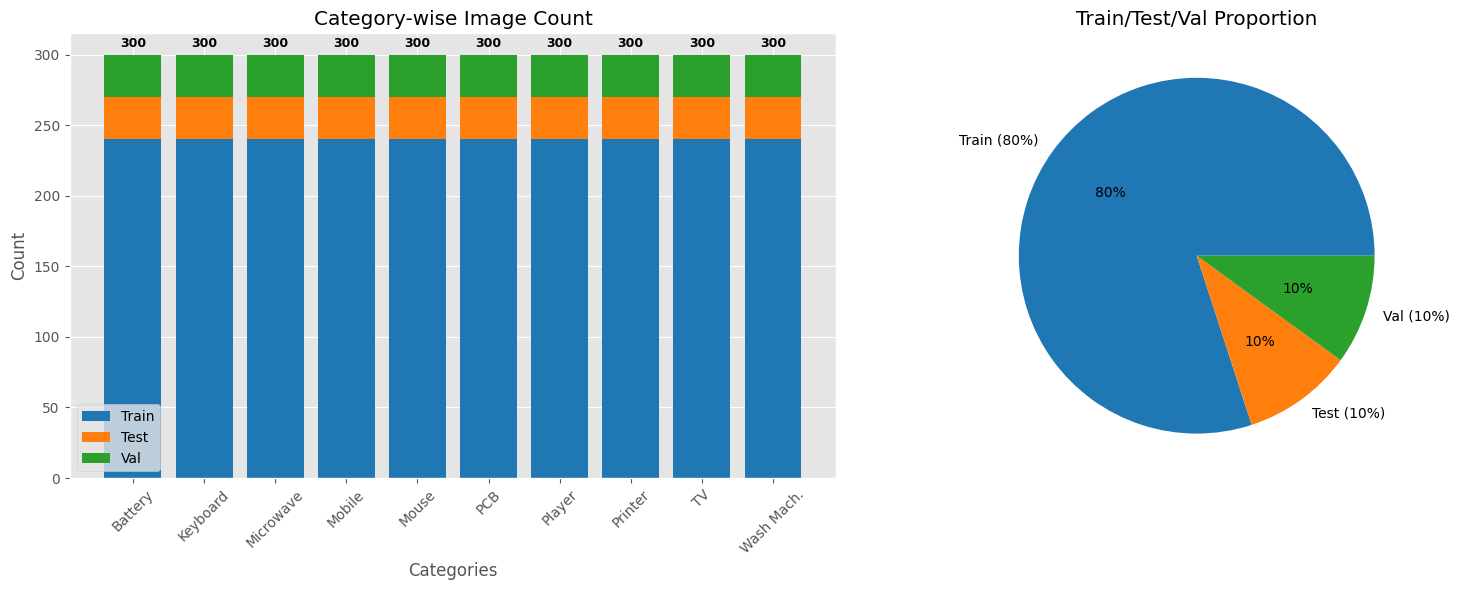

✔️ Visual Summary Complete


In [13]:
# Cell 5: Visual Summary - Bar and Pie Charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

x_labels = ['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 
            'PCB', 'Player', 'Printer', 'TV', 'Wash Mach.']

train = df_info['Train'].values
test = df_info['Test'].values
val = df_info['Validation'].values

# Bar plot
ax1.bar(x_labels, train, label='Train', color='#1f77b4')
ax1.bar(x_labels, test, bottom=train, label='Test', color='#ff7f0e')
ax1.bar(x_labels, val, bottom=train + test, label='Val', color='#2ca02c')

for i, total in enumerate(df_info['Total']):
    ax1.text(i, total + 5, str(total), ha='center', fontsize=9, weight='bold')

ax1.set_title('Category-wise Image Count')
ax1.set_xlabel('Categories')
ax1.set_ylabel('Count')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# Pie plot
split_pie = [df_info['Train'].sum(), df_info['Test'].sum(), df_info['Validation'].sum()]
labels_pie = ['Train (80%)', 'Test (10%)', 'Val (10%)']
ax2.pie(split_pie, labels=labels_pie, autopct='%1.0f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax2.set_title('Train/Test/Val Proportion')

plt.tight_layout()
plt.show()

print("✔️ Visual Summary Complete")


Battery: (150, 150)
Keyboard: (150, 150)
Microwave: (150, 150)
Mobile: (150, 150)
Mouse: (150, 150)
PCB: (150, 150)
Player: (150, 150)
Printer: (150, 150)
Television: (150, 150)
Washing Machine: (150, 150)


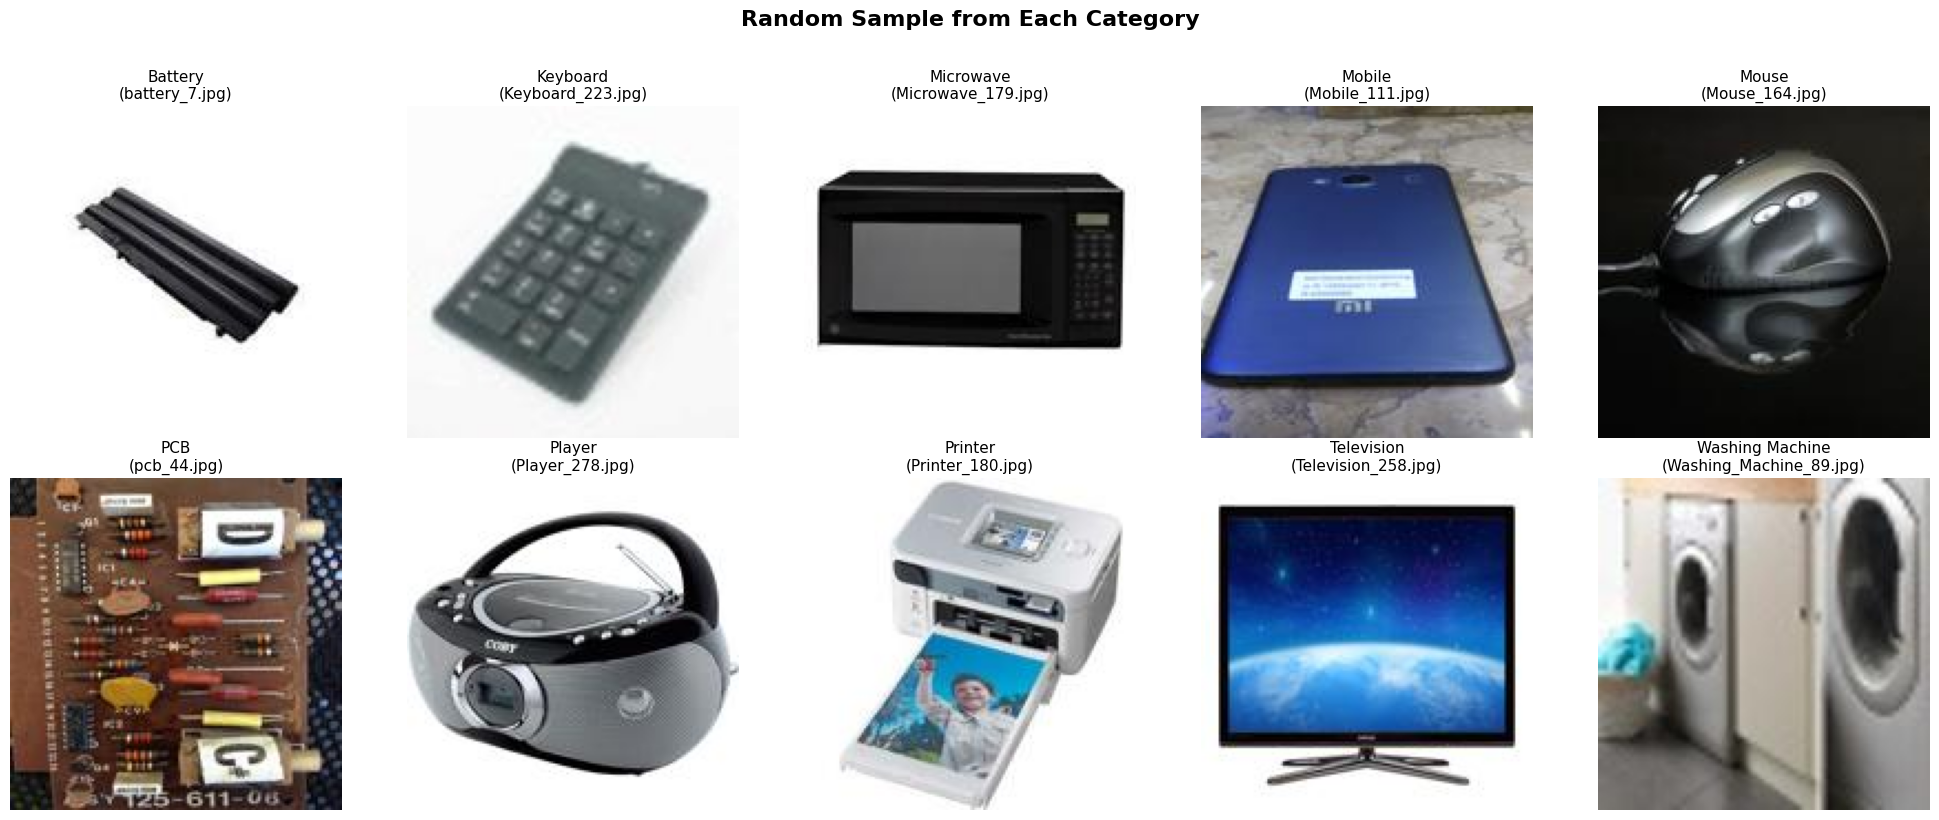

🖼️ Image Preview Completed


In [16]:
# Cell 6: Show Random Sample Image per Category
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

def get_random_image(cat, split='train'):
    folder = data_root / split / cat
    if folder.exists():
        images = list(folder.glob("*"))
        if images:
            img = random.choice(images)
            return Image.open(img), img.name
    return None, None

for i, cat in enumerate(categories):
    try:
        img, name = get_random_image(cat)
        axes[i].imshow(img)
        axes[i].set_title(f"{cat}\n({name})", fontsize=11)
        axes[i].axis('off')
        print(f"{cat}: {img.size}")
    except Exception as e:
        print(f"⚠️ {cat}: Failed to load image — {e}")
        axes[i].text(0.5, 0.5, f"Error\n{cat}", ha='center', va='center', transform=axes[i].transAxes)
        axes[i].axis('off')

plt.suptitle("Random Sample from Each Category", fontsize=16, weight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("🖼️ Image Preview Completed")
